<a href="https://colab.research.google.com/github/pallavdwivedi/OralVis-Dental-Tooth-Detection-Project/blob/main/Tooth_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install YOLOv11 (Ultralytics package)
!pip install ultralytics

# Install additional dependencies
!pip install opencv-python matplotlib seaborn scikit-learn pandas numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00


In [ ]:
# Check if your zip file exists
import os
zip_path = '/content/drive/MyDrive/ToothNumber_TaskDataset.zip'
print(f"File exists: {os.path.exists(zip_path)}")
print(f"File size: {os.path.getsize(zip_path) / (1024*1024):.2f} MB")


File exists: True
File size: 40.66 MB


In [ ]:
import zipfile
import os

# Define paths
zip_path = '/content/drive/MyDrive/ToothNumber_TaskDataset.zip'
extract_path = '/content/drive/MyDrive/ToothNumber_Dataset'  # Extract to Drive

# Create extraction directory
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")


Dataset extracted to: /content/drive/MyDrive/ToothNumber_Dataset


In [3]:
import zipfile

# Extract to local Colab storage for faster access during training
zip_path = '/content/drive/MyDrive/ToothNumber_TaskDataset.zip'
extract_path = '/content/dataset'  # Local Colab storage

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to local storage: {extract_path}")


Dataset extracted to local storage: /content/dataset


Dataset Organization Script

In [4]:
import os
import shutil
import random
from pathlib import Path
import glob

def organize_dataset_final(source_dir, output_dir):
    """
    Organize dataset into train/val/test splits (80/10/10)
    Updated for your confirmed structure: /content/dataset/images and /content/dataset/labels
    """
    print("Starting final dataset organization...")

    # Create output directories
    splits = ['train', 'val', 'test']
    for split in splits:
        os.makedirs(f"{output_dir}/{split}/images", exist_ok=True)
        os.makedirs(f"{output_dir}/{split}/labels", exist_ok=True)
        print(f"✅ Created {split} directories")

    # Define paths to images and labels
    images_dir = os.path.join(source_dir, 'images')
    labels_dir = os.path.join(source_dir, 'labels')

    print(f"Looking for images in: {images_dir}")
    print(f"Looking for labels in: {labels_dir}")

    # Find all image files
    image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
    image_files = []

    for ext in image_extensions:
        pattern = os.path.join(images_dir, ext)
        found_files = glob.glob(pattern)
        image_files.extend(found_files)

    print(f"📷 Found {len(image_files)} images")

    # Show sample image names
    if image_files:
        print("Sample image files:")
        for i, img in enumerate(image_files[:3]):
            print(f"  {i+1}. {os.path.basename(img)}")

    # Find valid image-label pairs
    valid_pairs = []
    missing_labels = []

    for img_path in image_files:
        img_name = os.path.basename(img_path)
        img_name_no_ext = os.path.splitext(img_name)[0]

        # Corresponding label file
        label_name = f"{img_name_no_ext}.txt"
        label_path = os.path.join(labels_dir, label_name)

        if os.path.exists(label_path):
            valid_pairs.append((img_path, label_path))
        else:
            missing_labels.append(img_name)

    print(f"📋 Valid image-label pairs: {len(valid_pairs)}")

    if missing_labels:
        print(f"⚠️  WARNING: {len(missing_labels)} images missing labels:")
        for missing in missing_labels[:5]:
            print(f"  - {missing}")
        if len(missing_labels) > 5:
            print(f"  ... and {len(missing_labels) - 5} more")

    if len(valid_pairs) == 0:
        print("❌ ERROR: No valid image-label pairs found!")
        return None

    # Shuffle for random split
    random.shuffle(valid_pairs)

    # Calculate splits (80% train, 10% val, 10% test)
    total = len(valid_pairs)
    train_end = int(0.8 * total)
    val_end = int(0.9 * total)

    splits_data = {
        'train': valid_pairs[:train_end],
        'val': valid_pairs[train_end:val_end],
        'test': valid_pairs[val_end:]
    }

    # Copy files to organized structure
    for split, pairs in splits_data.items():
        print(f"\n📂 Copying {len(pairs)} files to {split} set...")

        for i, (img_path, label_path) in enumerate(pairs):
            img_name = os.path.basename(img_path)
            label_name = os.path.basename(label_path)

            # Destination paths
            dst_img = os.path.join(output_dir, split, 'images', img_name)
            dst_label = os.path.join(output_dir, split, 'labels', label_name)

            # Copy files
            shutil.copy2(img_path, dst_img)
            shutil.copy2(label_path, dst_label)

            # Progress indicator
            if (i + 1) % 50 == 0:
                print(f"  📈 Copied {i + 1}/{len(pairs)} files...")

    # Final summary
    print("\n" + "="*60)
    print("🎉 DATASET ORGANIZATION COMPLETE!")
    print("="*60)

    for split in splits:
        img_count = len(os.listdir(f"{output_dir}/{split}/images"))
        label_count = len(os.listdir(f"{output_dir}/{split}/labels"))
        print(f"{split.capitalize():>5}: {img_count:>3} images, {label_count:>3} labels")

    total_processed = sum(len(pairs) for pairs in splits_data.values())
    print(f"\nTotal processed: {total_processed} valid image-label pairs")

    return splits_data

# Execute the organization
source_directory = "/content/dataset"  # Your confirmed dataset location
output_directory = "/content/organized_dataset"  # Where organized data will go

# Set random seed for reproducible results
random.seed(42)

print("=" * 60)
print("🦷 DENTAL TOOTH DATASET ORGANIZATION")
print("=" * 60)

# Run the organization
dataset_splits = organize_dataset_final(source_directory, output_directory)

if dataset_splits:
    # Verify the final structure
    print("\n" + "="*50)
    print("✅ VERIFYING ORGANIZED DATASET")
    print("="*50)

    # Quick verification
    for split in ['train', 'val', 'test']:
        img_dir = f"/content/organized_dataset/{split}/images"
        lbl_dir = f"/content/organized_dataset/{split}/labels"

        if os.path.exists(img_dir) and os.path.exists(lbl_dir):
            img_count = len([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))])
            lbl_count = len([f for f in os.listdir(lbl_dir) if f.endswith('.txt')])
            print(f"📁 {split}: {img_count} images, {lbl_count} labels")


    print("Dataset has been successfully organized into YOLO format.")

else:
    print("\n❌ Organization failed. Please run the debug script to check paths.")


🦷 DENTAL TOOTH DATASET ORGANIZATION
Starting final dataset organization...
✅ Created train directories
✅ Created val directories
✅ Created test directories
Looking for images in: /content/dataset/images
Looking for labels in: /content/dataset/labels
📷 Found 497 images
Sample image files:
  1. cate8-00305_jpg.rf.8c8278b3305348748e46af2f33e2e538.jpg
  2. cate5-00108_jpg.rf.996d16807e3c8734f22dd2e43b6ac2d9.jpg
  3. cate8-00257_jpg.rf.2f8f9d5cbd873f542d90bcc57bceae33.jpg
📋 Valid image-label pairs: 497

📂 Copying 397 files to train set...
  📈 Copied 50/397 files...
  📈 Copied 100/397 files...
  📈 Copied 150/397 files...
  📈 Copied 200/397 files...
  📈 Copied 250/397 files...
  📈 Copied 300/397 files...
  📈 Copied 350/397 files...

📂 Copying 50 files to val set...
  📈 Copied 50/50 files...

📂 Copying 50 files to test set...
  📈 Copied 50/50 files...

🎉 DATASET ORGANIZATION COMPLETE!
Train: 397 images, 397 labels
  Val:  50 images,  50 labels
 Test:  50 images,  50 labels

Total processed: 49

In [5]:
import os

def create_data_yaml():
    """
    Create data.yaml file with correct paths and all 32 FDI tooth classes
    """
    print("Creating data.yaml configuration file...")

    # Define the data.yaml content with your exact class mapping from the assignment
    data_yaml_content = """# Dental Tooth Detection Dataset Configuration
# Dataset organized for YOLOv11 training

# Paths to train/val/test datasets (relative to this file)
train: /content/organized_dataset/train/images
val: /content/organized_dataset/val/images
test: /content/organized_dataset/test/images

# Number of classes
nc: 32

# Class names (FDI Numbering System) - DO NOT CHANGE ORDER
names:
  0: Canine (13)
  1: Canine (23)
  2: Canine (33)
  3: Canine (43)
  4: Central Incisor (21)
  5: Central Incisor (41)
  6: Central Incisor (31)
  7: Central Incisor (11)
  8: First Molar (16)
  9: First Molar (26)
  10: First Molar (36)
  11: First Molar (46)
  12: First Premolar (14)
  13: First Premolar (34)
  14: First Premolar (44)
  15: First Premolar (24)
  16: Lateral Incisor (22)
  17: Lateral Incisor (32)
  18: Lateral Incisor (42)
  19: Lateral Incisor (12)
  20: Second Molar (17)
  21: Second Molar (27)
  22: Second Molar (37)
  23: Second Molar (47)
  24: Second Premolar (15)
  25: Second Premolar (25)
  26: Second Premolar (35)
  27: Second Premolar (45)
  28: Third Molar (18)
  29: Third Molar (28)
  30: Third Molar (38)
  31: Third Molar (48)
"""

    # Write the data.yaml file
    yaml_path = '/content/data.yaml'
    with open(yaml_path, 'w') as f:
        f.write(data_yaml_content)

    print(f"✅ data.yaml created at: {yaml_path}")

    # Verify the file was created
    if os.path.exists(yaml_path):
        print("✅ File verification successful")

        # Show file contents
        print("\n📄 data.yaml contents:")
        print("-" * 50)
        with open(yaml_path, 'r') as f:
            content = f.read()
            print(content)
        print("-" * 50)

    else:
        print("❌ Error: data.yaml file was not created")
        return False

    # Verify dataset paths exist
    print("\n🔍 Verifying dataset paths...")

    paths_to_check = [
        '/content/organized_dataset/train/images',
        '/content/organized_dataset/val/images',
        '/content/organized_dataset/test/images',
        '/content/organized_dataset/train/labels',
        '/content/organized_dataset/val/labels',
        '/content/organized_dataset/test/labels'
    ]

    all_paths_exist = True
    for path in paths_to_check:
        exists = os.path.exists(path)
        status = "✅" if exists else "❌"
        count = len(os.listdir(path)) if exists else 0
        path_type = "images" if "images" in path else "labels"
        print(f"{status} {path} ({count} {path_type})")
        if not exists:
            all_paths_exist = False

    if all_paths_exist:
        print("\n🎉 All dataset paths verified successfully!")
        print("📊 Dataset configuration is ready for training")
        return True
    else:
        print("\n⚠️  Some dataset paths are missing. Please check organization step.")
        return False

def verify_label_format():
    """
    Quick verification that labels are in proper YOLO format
    """
    print("\n🔍 Verifying label format...")

    # Check a sample label file
    train_labels_dir = '/content/organized_dataset/train/labels'
    if os.path.exists(train_labels_dir):
        label_files = [f for f in os.listdir(train_labels_dir) if f.endswith('.txt')]

        if label_files:
            sample_label = os.path.join(train_labels_dir, label_files[0])

            with open(sample_label, 'r') as f:
                lines = f.readlines()

            print(f"📋 Sample label file: {label_files[0]}")
            print(f"📝 Number of annotations: {len(lines)}")

            if lines:
                # Check first annotation
                first_line = lines[0].strip()
                parts = first_line.split()

                print(f"📄 Sample annotation: {first_line}")

                # Verify YOLO format
                if len(parts) == 5:
                    try:
                        class_id = int(parts[0])
                        x_center = float(parts[1])
                        y_center = float(parts[2])
                        width = float(parts[3])
                        height = float(parts[4])

                        # Check if values are normalized (0-1)
                        coords_normalized = all(0.0 <= val <= 1.0 for val in [x_center, y_center, width, height])
                        class_valid = 0 <= class_id <= 31

                        print(f"✅ YOLO format: Valid")
                        print(f"✅ Class ID range: {class_valid} (class {class_id})")
                        print(f"✅ Coordinates normalized: {coords_normalized}")

                        return True

                    except ValueError:
                        print("❌ Error: Invalid number format in annotation")
                        return False
                else:
                    print(f"❌ Error: Expected 5 values per line, got {len(parts)}")
                    return False
            else:
                print("⚠️  Warning: Label file is empty")
                return False
        else:
            print("❌ No label files found")
            return False
    else:
        print("❌ Train labels directory not found")
        return False

# Execute Step 2
print("=" * 60)
print("📋 STEP 2: DATA.YAML CONFIGURATION")
print("=" * 60)

# Create data.yaml file
yaml_success = create_data_yaml()

if yaml_success:
    # Verify label format
    label_success = verify_label_format()

    if label_success:
        print("\n" + "="*60)
        print("🚀 STEP 2 COMPLETE - READY FOR TRAINING!")
        print("="*60)
        print("✅ data.yaml created with correct paths")
        print("✅ All 32 FDI tooth classes configured")
        print("✅ Dataset paths verified")
        print("✅ Label format validated")
        print("\n🎯 Next: Step 3 - Environment Setup & Model Training")
    else:
        print("\n❌ Label format issues detected. Please check annotations.")
else:
    print("\n❌ data.yaml creation failed. Please check paths.")


📋 STEP 2: DATA.YAML CONFIGURATION
Creating data.yaml configuration file...
✅ data.yaml created at: /content/data.yaml
✅ File verification successful

📄 data.yaml contents:
--------------------------------------------------
# Dental Tooth Detection Dataset Configuration
# Dataset organized for YOLOv11 training

# Paths to train/val/test datasets (relative to this file)
train: /content/organized_dataset/train/images
val: /content/organized_dataset/val/images  
test: /content/organized_dataset/test/images

# Number of classes
nc: 32

# Class names (FDI Numbering System) - DO NOT CHANGE ORDER
names:
  0: Canine (13)
  1: Canine (23)
  2: Canine (33)
  3: Canine (43)
  4: Central Incisor (21)
  5: Central Incisor (41)
  6: Central Incisor (31)
  7: Central Incisor (11)
  8: First Molar (16)
  9: First Molar (26)
  10: First Molar (36)
  11: First Molar (46)
  12: First Premolar (14)
  13: First Premolar (34)
  14: First Premolar (44)
  15: First Premolar (24)
  16: Lateral Incisor (22)
  17

In [6]:
# Install dependencies
!pip install ultralytics

# Import required libraries
from ultralytics import YOLO
import torch

def setup_training_environment():
    """Setup training environment and check GPU availability"""
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Training device: {device}")

    if device == 'cuda':
        print(f"GPU: {torch.cuda.get_device_name()}")
        print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

    return device

def start_training():
    """Train YOLOv11 model on dental dataset"""
    # Load pretrained model
    model = YOLO('yolo11s.pt')

    # Start training
    results = model.train(
        data='/content/data.yaml',
        epochs=100,
        imgsz=640,
        batch=16,
        device='auto',
        workers=4,
        project='runs/detect',
        name='dental_tooth_detection',
        save_period=10,
        plots=True,
        verbose=True
    )

    return model, results

# Setup environment
print("Setting up training environment...")
device = setup_training_environment()

# Start training
print("Starting YOLOv11 training...")
model, results = start_training()

print("Training completed!")


Setting up training environment...
Training device: cuda
GPU: Tesla T4
GPU Memory: 15.8 GB
Starting YOLOv11 training...
Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:auto (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=auto, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dental_tooth_detection2, nbs=64, nms=Fa

Model Evaluation & Metrics

In [8]:
from ultralytics import YOLO
import os

def evaluate_model():
    """Evaluate trained model and generate metrics"""

    # Load trained model (best weights)
    model = YOLO('/content/runs/detect/dental_tooth_detection/weights/best.pt')

    # Evaluate on test set
    print("Evaluating on test set...")
    metrics = model.val(data='/content/data.yaml', split='test')

    # Print key metrics
    print("\n" + "="*50)
    print("MODEL PERFORMANCE ON TEST SET")
    print("="*50)
    print(f"mAP@50:     {metrics.box.map50:.4f}")
    print(f"mAP@50-95:  {metrics.box.map:.4f}")
    print(f"Precision:  {metrics.box.mp:.4f}")
    print(f"Recall:     {metrics.box.mr:.4f}")

    # Generate sample predictions
    test_images_dir = '/content/organized_dataset/test/images'
    sample_images = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir)[:3]]

    print(f"\nGenerating sample predictions...")
    for i, img_path in enumerate(sample_images):
        results = model.predict(img_path, save=True, project='runs/detect', name='sample_predictions')
        print(f"✅ Sample {i+1} saved: {os.path.basename(img_path)}")

    print("\n🎉 Evaluation complete!")
    print("📁 Files saved:")
    print("  - Confusion matrix: runs/detect/dental_tooth_detection/val/confusion_matrix.png")
    print("  - Sample predictions: runs/detect/sample_predictions/")

    return metrics

# Run evaluation
metrics = evaluate_model()


Evaluating on test set...
Ultralytics 8.3.187 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,425,184 parameters, 0 gradients, 21.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1357.3±659.1 MB/s, size: 95.1 KB)
val: Scanning /content/organized_dataset/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 1532.9it/s 0.0s
val: New cache created: /content/organized_dataset/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 34, len(boxes) = 1489. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.58it/s 6.9s
                   all         50       1489        0.9      0.902      0.921       0.64
           Canine (13)         48 

Training Curves Visualization

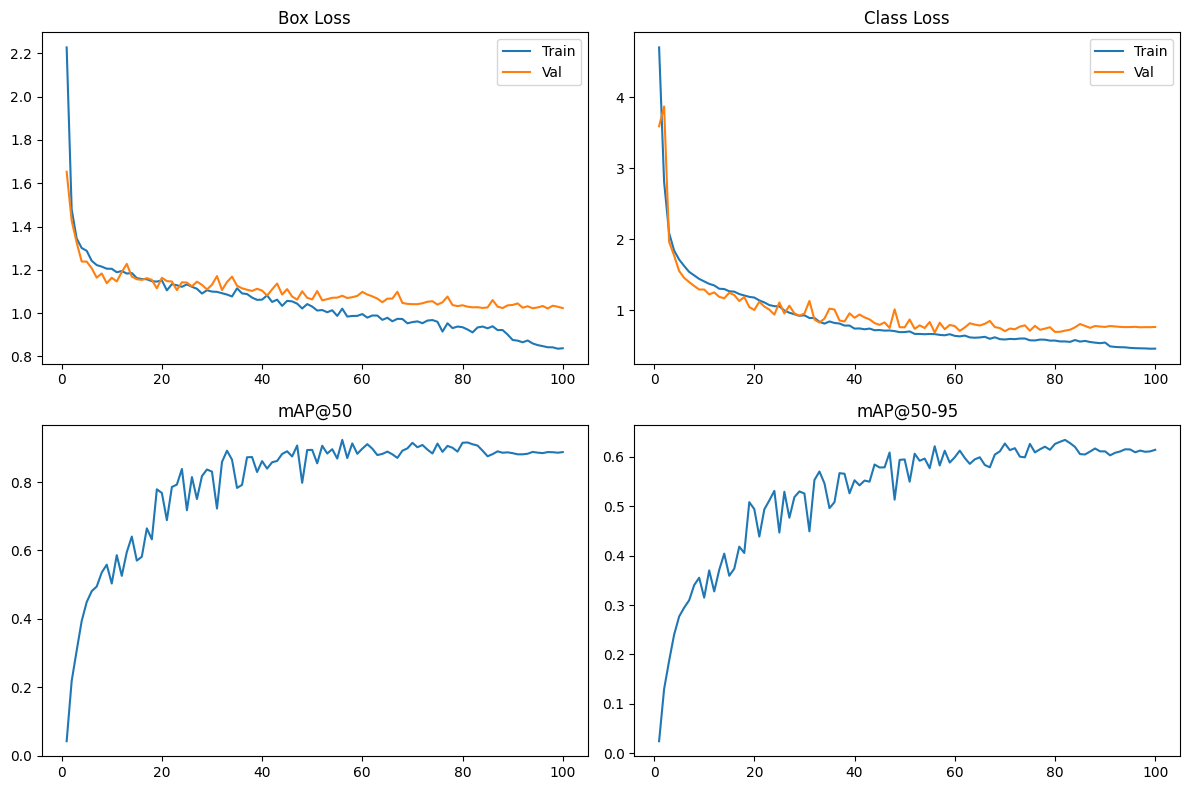

✅ Training curves saved: /content/training_curves.png


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_training_curves():
    """Generate training loss and mAP curves"""

    # Load training results
    results_path = '/content/runs/detect/dental_tooth_detection/results.csv'
    df = pd.read_csv(results_path)

    # Create plots
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Loss plots
    axes[0,0].plot(df['epoch'], df['train/box_loss'], label='Train')
    axes[0,0].plot(df['epoch'], df['val/box_loss'], label='Val')
    axes[0,0].set_title('Box Loss')
    axes[0,0].legend()

    axes[0,1].plot(df['epoch'], df['train/cls_loss'], label='Train')
    axes[0,1].plot(df['epoch'], df['val/cls_loss'], label='Val')
    axes[0,1].set_title('Class Loss')
    axes[0,1].legend()

    # mAP plots
    axes[1,0].plot(df['epoch'], df['metrics/mAP50(B)'])
    axes[1,0].set_title('mAP@50')

    axes[1,1].plot(df['epoch'], df['metrics/mAP50-95(B)'])
    axes[1,1].set_title('mAP@50-95')

    plt.tight_layout()
    plt.savefig('/content/training_curves.png', dpi=300)
    plt.show()

    print("✅ Training curves saved: /content/training_curves.png")

# Generate curves
generate_training_curves()


In [10]:
def prepare_submission_files():
    """Download all required submission files"""

    from google.colab import files

    print("Downloading submission files...")

    # Key model files
    files.download('/content/runs/detect/dental_tooth_detection/weights/best.pt')

    # Metrics and visualizations
    files.download('/content/runs/detect/dental_tooth_detection/results.csv')
    files.download('/content/runs/detect/dental_tooth_detection/confusion_matrix.png')
    files.download('/content/runs/detect/dental_tooth_detection/results.png')
    files.download('/content/training_curves.png')

    # Configuration
    files.download('/content/data.yaml')

    print("✅ All submission files downloaded!")

# Download files
prepare_submission_files()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ All submission files downloaded!


 Sample Predictions & Visualization

In [11]:
from ultralytics import YOLO
import os

# Load trained model
model = YOLO('/content/runs/detect/dental_tooth_detection/weights/best.pt')

# Get 3 test images
test_images_dir = '/content/organized_dataset/test/images'
test_images = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir)[:3]]

# Generate predictions with bounding boxes and FDI labels
for i, img_path in enumerate(test_images):
    results = model.predict(img_path, save=True, conf=0.25, project='runs/predict', name='sample_results')
    print(f"Sample prediction {i+1} saved for: {os.path.basename(img_path)}")

print("Sample predictions saved in: /content/runs/predict/sample_results/")



image 1/1 /content/organized_dataset/test/images/cate10-00108_jpg.rf.912ca1f68f0307534ff59a071ed40224.jpg: 640x640 1 Canine (13), 1 Canine (23), 1 Canine (33), 1 Canine (43), 1 Central Incisor (21), 1 Central Incisor (41), 1 Central Incisor (31), 1 Central Incisor (11), 1 First Molar (16), 1 First Molar (26), 1 First Premolar (14), 1 First Premolar (34), 1 First Premolar (44), 1 First Premolar (24), 1 Lateral Incisor (22), 1 Lateral Incisor (32), 1 Lateral Incisor (42), 1 Lateral Incisor (12), 1 Second Molar (17), 1 Second Molar (27), 1 Second Molar (37), 1 Second Molar (47), 1 Second Premolar (15), 1 Second Premolar (25), 1 Second Premolar (35), 1 Second Premolar (45), 1 Third Molar (18), 1 Third Molar (28), 1 Third Molar (38), 1 Third Molar (48), 20.4ms
Speed: 2.1ms preprocess, 20.4ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/predict/sample_results
Sample prediction 1 saved for: cate10-00108_jpg.rf.912ca1f68f0307534ff59a071ed40224.jpg

im

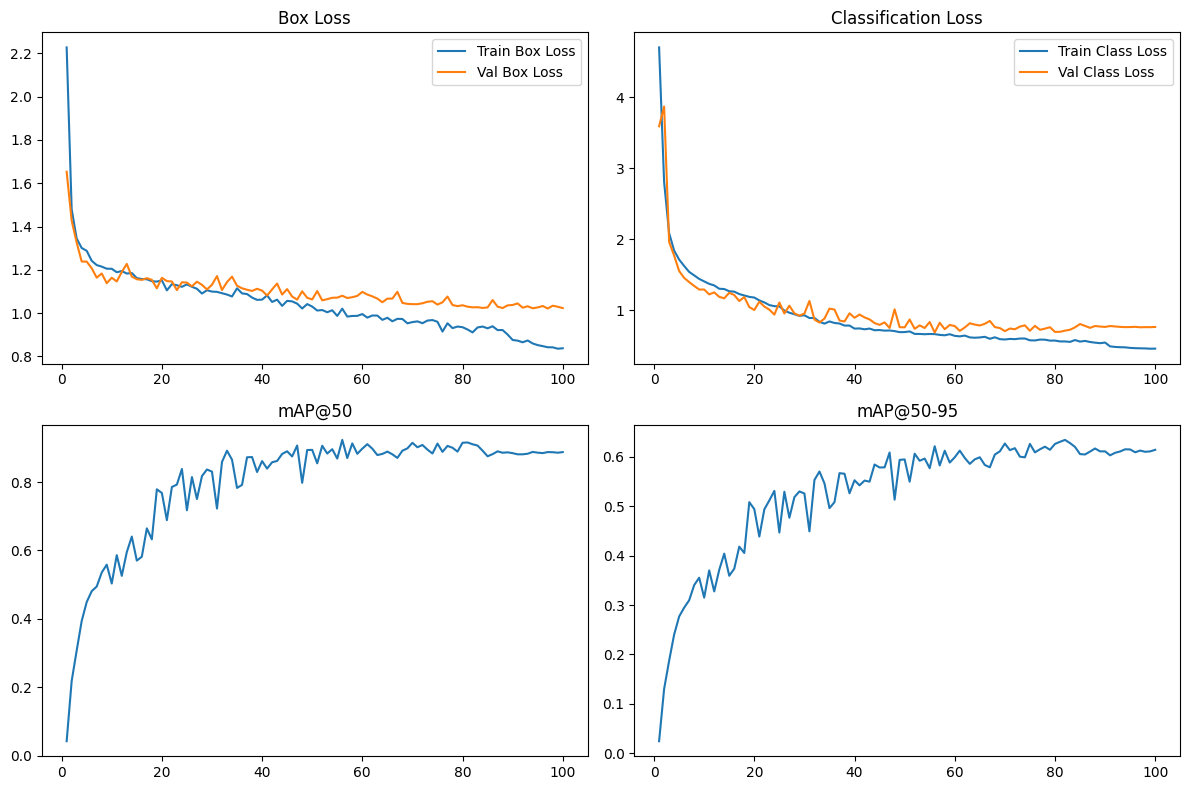

Final mAP@50: 0.8878
Final mAP@50-95: 0.6145


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your downloaded CSV
df = pd.read_csv('/content/results.csv')  # Adjust path if needed

# Generate training curves
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loss curves
axes[0,0].plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
axes[0,0].plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
axes[0,0].set_title('Box Loss')
axes[0,0].legend()

axes[0,1].plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
axes[0,1].plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss')
axes[0,1].set_title('Classification Loss')
axes[0,1].legend()

# mAP curves
axes[1,0].plot(df['epoch'], df['metrics/mAP50(B)'])
axes[1,0].set_title('mAP@50')

axes[1,1].plot(df['epoch'], df['metrics/mAP50-95(B)'])
axes[1,1].set_title('mAP@50-95')

plt.tight_layout()
plt.savefig('/content/training_curves.png', dpi=300)
plt.show()

# Print final metrics
final_row = df.iloc[-1]
print(f"Final mAP@50: {final_row['metrics/mAP50(B)']:.4f}")
print(f"Final mAP@50-95: {final_row['metrics/mAP50-95(B)']:.4f}")


In [17]:
from google.colab import files
import os
import shutil

# Create a comprehensive zip file with all submission materials
def create_submission_package():
    """Package all required files for submission"""

    # Base directory path (your confirmed path)
    base_dir = "/content/runs/detect/dental_tooth_detection"

    print("Creating submission package...")

    # Check if the directory exists
    if not os.path.exists(base_dir):
        print(f"❌ Directory not found: {base_dir}")
        print("Please check the exact path of your training results")
        return

    # List all files in the directory
    print(f"📁 Contents of {base_dir}:")
    for item in os.listdir(base_dir):
        item_path = os.path.join(base_dir, item)
        if os.path.isdir(item_path):
            file_count = len(os.listdir(item_path))
            print(f"   📂 {item}/ ({file_count} files)")
        else:
            print(f"   📄 {item}")

    # Create zip file for easy download
    zip_name = "dental_tooth_detection_submission"
    shutil.make_archive(f"/content/{zip_name}", 'zip', base_dir)

    # Download the zip file
    files.download(f"/content/{zip_name}.zip")
    print("✅ Submission package downloaded!")

    # Also download key individual files
    key_files = [
        f"{base_dir}/weights/best.pt",
        f"{base_dir}/confusion_matrix.png",
        f"{base_dir}/results.csv",
        f"{base_dir}/results.png",
        "/content/data.yaml"
    ]

    print("\n📥 Downloading individual key files:")
    for file_path in key_files:
        if os.path.exists(file_path):
            files.download(file_path)
            print(f"✅ Downloaded: {os.path.basename(file_path)}")
        else:
            print(f"❌ Not found: {file_path}")

# Run the function
create_submission_package()


Creating submission package...
📁 Contents of /content/runs/detect/dental_tooth_detection:
   📄 val_batch1_labels.jpg
   📄 BoxP_curve.png
   📄 val_batch0_labels.jpg
   📄 confusion_matrix_normalized.png
   📄 BoxPR_curve.png
   📄 train_batch2251.jpg
   📄 train_batch1.jpg
   📄 train_batch2252.jpg
   📄 val_batch0_pred.jpg
   📄 confusion_matrix.png
   📄 labels.jpg
   📄 results.png
   📄 train_batch0.jpg
   📄 val_batch1_pred.jpg
   📄 BoxF1_curve.png
   📄 args.yaml
   📄 train_batch2.jpg
   📄 BoxR_curve.png
   📄 results.csv
   📄 train_batch2250.jpg
   📂 weights/ (12 files)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Submission package downloaded!

📥 Downloading individual key files:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: best.pt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: confusion_matrix.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: results.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: results.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: data.yaml
